In [37]:
import librosa
import numpy as np

import pandas as pd

import os

import matplotlib.pyplot as plt

In [38]:
dir_xc = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar\Dataset\xeno-canto"
dir_k = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar\Dataset\noise-audio-data"

list_xc = [os.path.join(dir_xc, x) for x in os.listdir(dir_xc)]
list_k = [os.path.join(dir_k, x) for x in os.listdir(dir_k)]

In [39]:
sample_xc = list_xc[0]
sample_k = list_k[0]

In [40]:
audio_xc, sr_xc = librosa.load(sample_xc, sr=48000)
audio_k, sr_k = librosa.load(sample_k, sr=48000)

In [41]:
display(
    audio_xc.shape,
    sr_xc,
    audio_k.shape,
    sr_k
)

(3173410,)

48000

(240001,)

48000

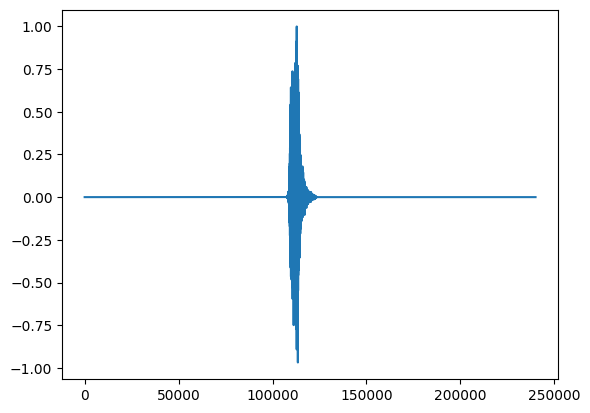

In [42]:
plt.plot(audio_k)

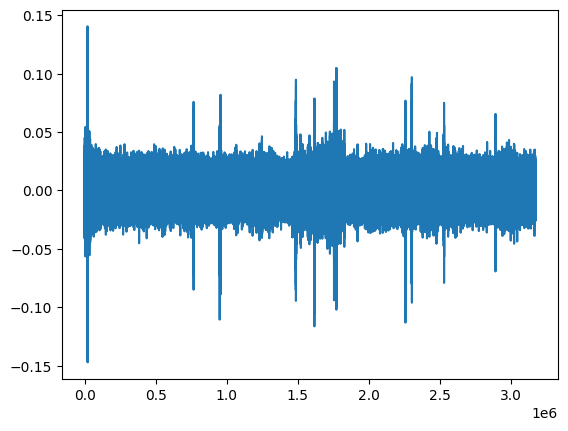

In [43]:
plt.plot(audio_xc)